In [1]:
%load_ext autoreload
%autoreload 2
from networks import *
from data import *

In [2]:
data = Data(soap_path="/net/hypernova/data2/FLAMINGO/L1000N1800/HYDRO_FIDUCIAL/SOAP/halo_properties_0077.hdf5", selection_type="SO/500_crit/")
data.add_soap_property("SORadius")
data.add_soap_property("StarFormationRate")
data.add_soap_property("GasTemperature")
data.make_soap_dataset(target_property="GasMass", use_log=True)

In [5]:
model = NeuralNetwork(lr=0.0001)
model.set_linear_model(len(data.properties))
model.set_optimizer()

model.train(data, nr_epochs=0)
# model.test(data)

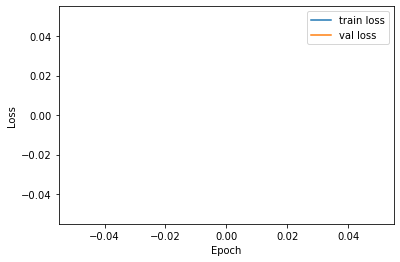

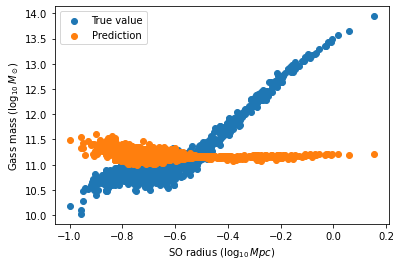

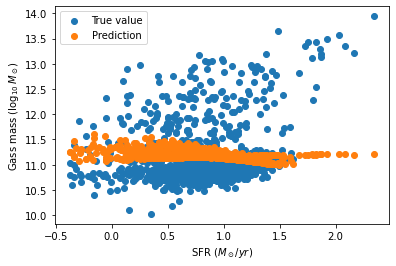

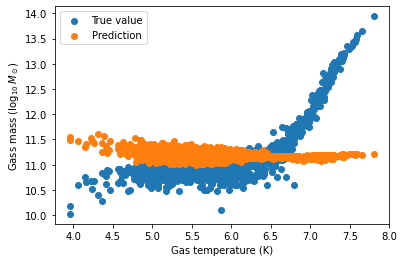

In [6]:
import matplotlib.pyplot as plt

plt.plot(model.epochs, model.losses, label="train loss")
plt.plot(model.epochs, model.val_losses, label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


with torch.no_grad():
    nr_points = 1000
    prediction = model.model(torch.Tensor(data.testx[:nr_points]))
    prediction = prediction * data.std_y + data.mean_y

    testx = data.testx * data.std_x + data.mean_x
    testy = data.testy * data.std_y + data.mean_y

    plt.scatter(testx[:nr_points, 0], testy[:nr_points], label="True value")
    plt.scatter(testx[:nr_points, 0], prediction[:nr_points], label="Prediction")
    plt.xlabel("SO radius ($\log_{10}Mpc$)")
    plt.ylabel("Gass mass ($\log_{10}M_\odot$)")
    plt.legend()
    plt.show()


    plt.scatter(testx[:nr_points, 1], testy[:nr_points], label="True value")
    plt.scatter(testx[:nr_points, 1], prediction[:nr_points], label="Prediction")
    plt.xlabel("SFR ($M_\odot / yr$)")
    plt.ylabel("Gass mass ($\log_{10}M_\odot$)")
    plt.legend()
    plt.show()


    plt.scatter(testx[:nr_points, 2], testy[:nr_points], label="True value")
    plt.scatter(testx[:nr_points, 2], prediction[:nr_points], label="Prediction")
    plt.xlabel("Gas temperature (K)")
    plt.ylabel("Gass mass ($\log_{10}M_\odot$)")
    plt.legend()
    plt.show()